# Question 1:
Use the User dataset perform Random Forest and compare with Decision Tree.

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.getcwd()

'C:\\Users\\Dhruvraj\\Desktop\\LETS UPGRADE\\LetsUpgrade AI ML\\Assignments'

In [3]:
os.chdir('C:\\Users\\Dhruvraj\\Desktop\\LETS UPGRADE\\LetsUpgrade AI ML\\csv')

In [4]:
df=pd.read_csv('salary.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
X=df.iloc[:,[2,3]].values
y=df.iloc[:,4].values
print(X)
print()
print()
print(y)

[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [    28  79000]
 [    22  1800

In [6]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.35,random_state=0)

In [7]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [8]:
#==DECISION TREE==

In [9]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [10]:
dt= DecisionTreeClassifier(criterion='entropy',random_state=0)

In [11]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [12]:
dtpred= dt.predict(X_test)

In [13]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve,auc

print('CONFUSION MATRIX ===>\n',confusion_matrix(y_test,dtpred), end='\n\n')
print('CLASSIFICATION REPORT ===> \n',classification_report(y_test,dtpred), end='\n\n')
print('ACCURACY SCORE ==> \n',accuracy_score(y_test,dtpred))

CONFUSION MATRIX ===>
 [[79 10]
 [ 9 42]]

CLASSIFICATION REPORT ===> 
               precision    recall  f1-score   support

           0       0.90      0.89      0.89        89
           1       0.81      0.82      0.82        51

    accuracy                           0.86       140
   macro avg       0.85      0.86      0.85       140
weighted avg       0.86      0.86      0.86       140


ACCURACY SCORE ==> 
 0.8642857142857143


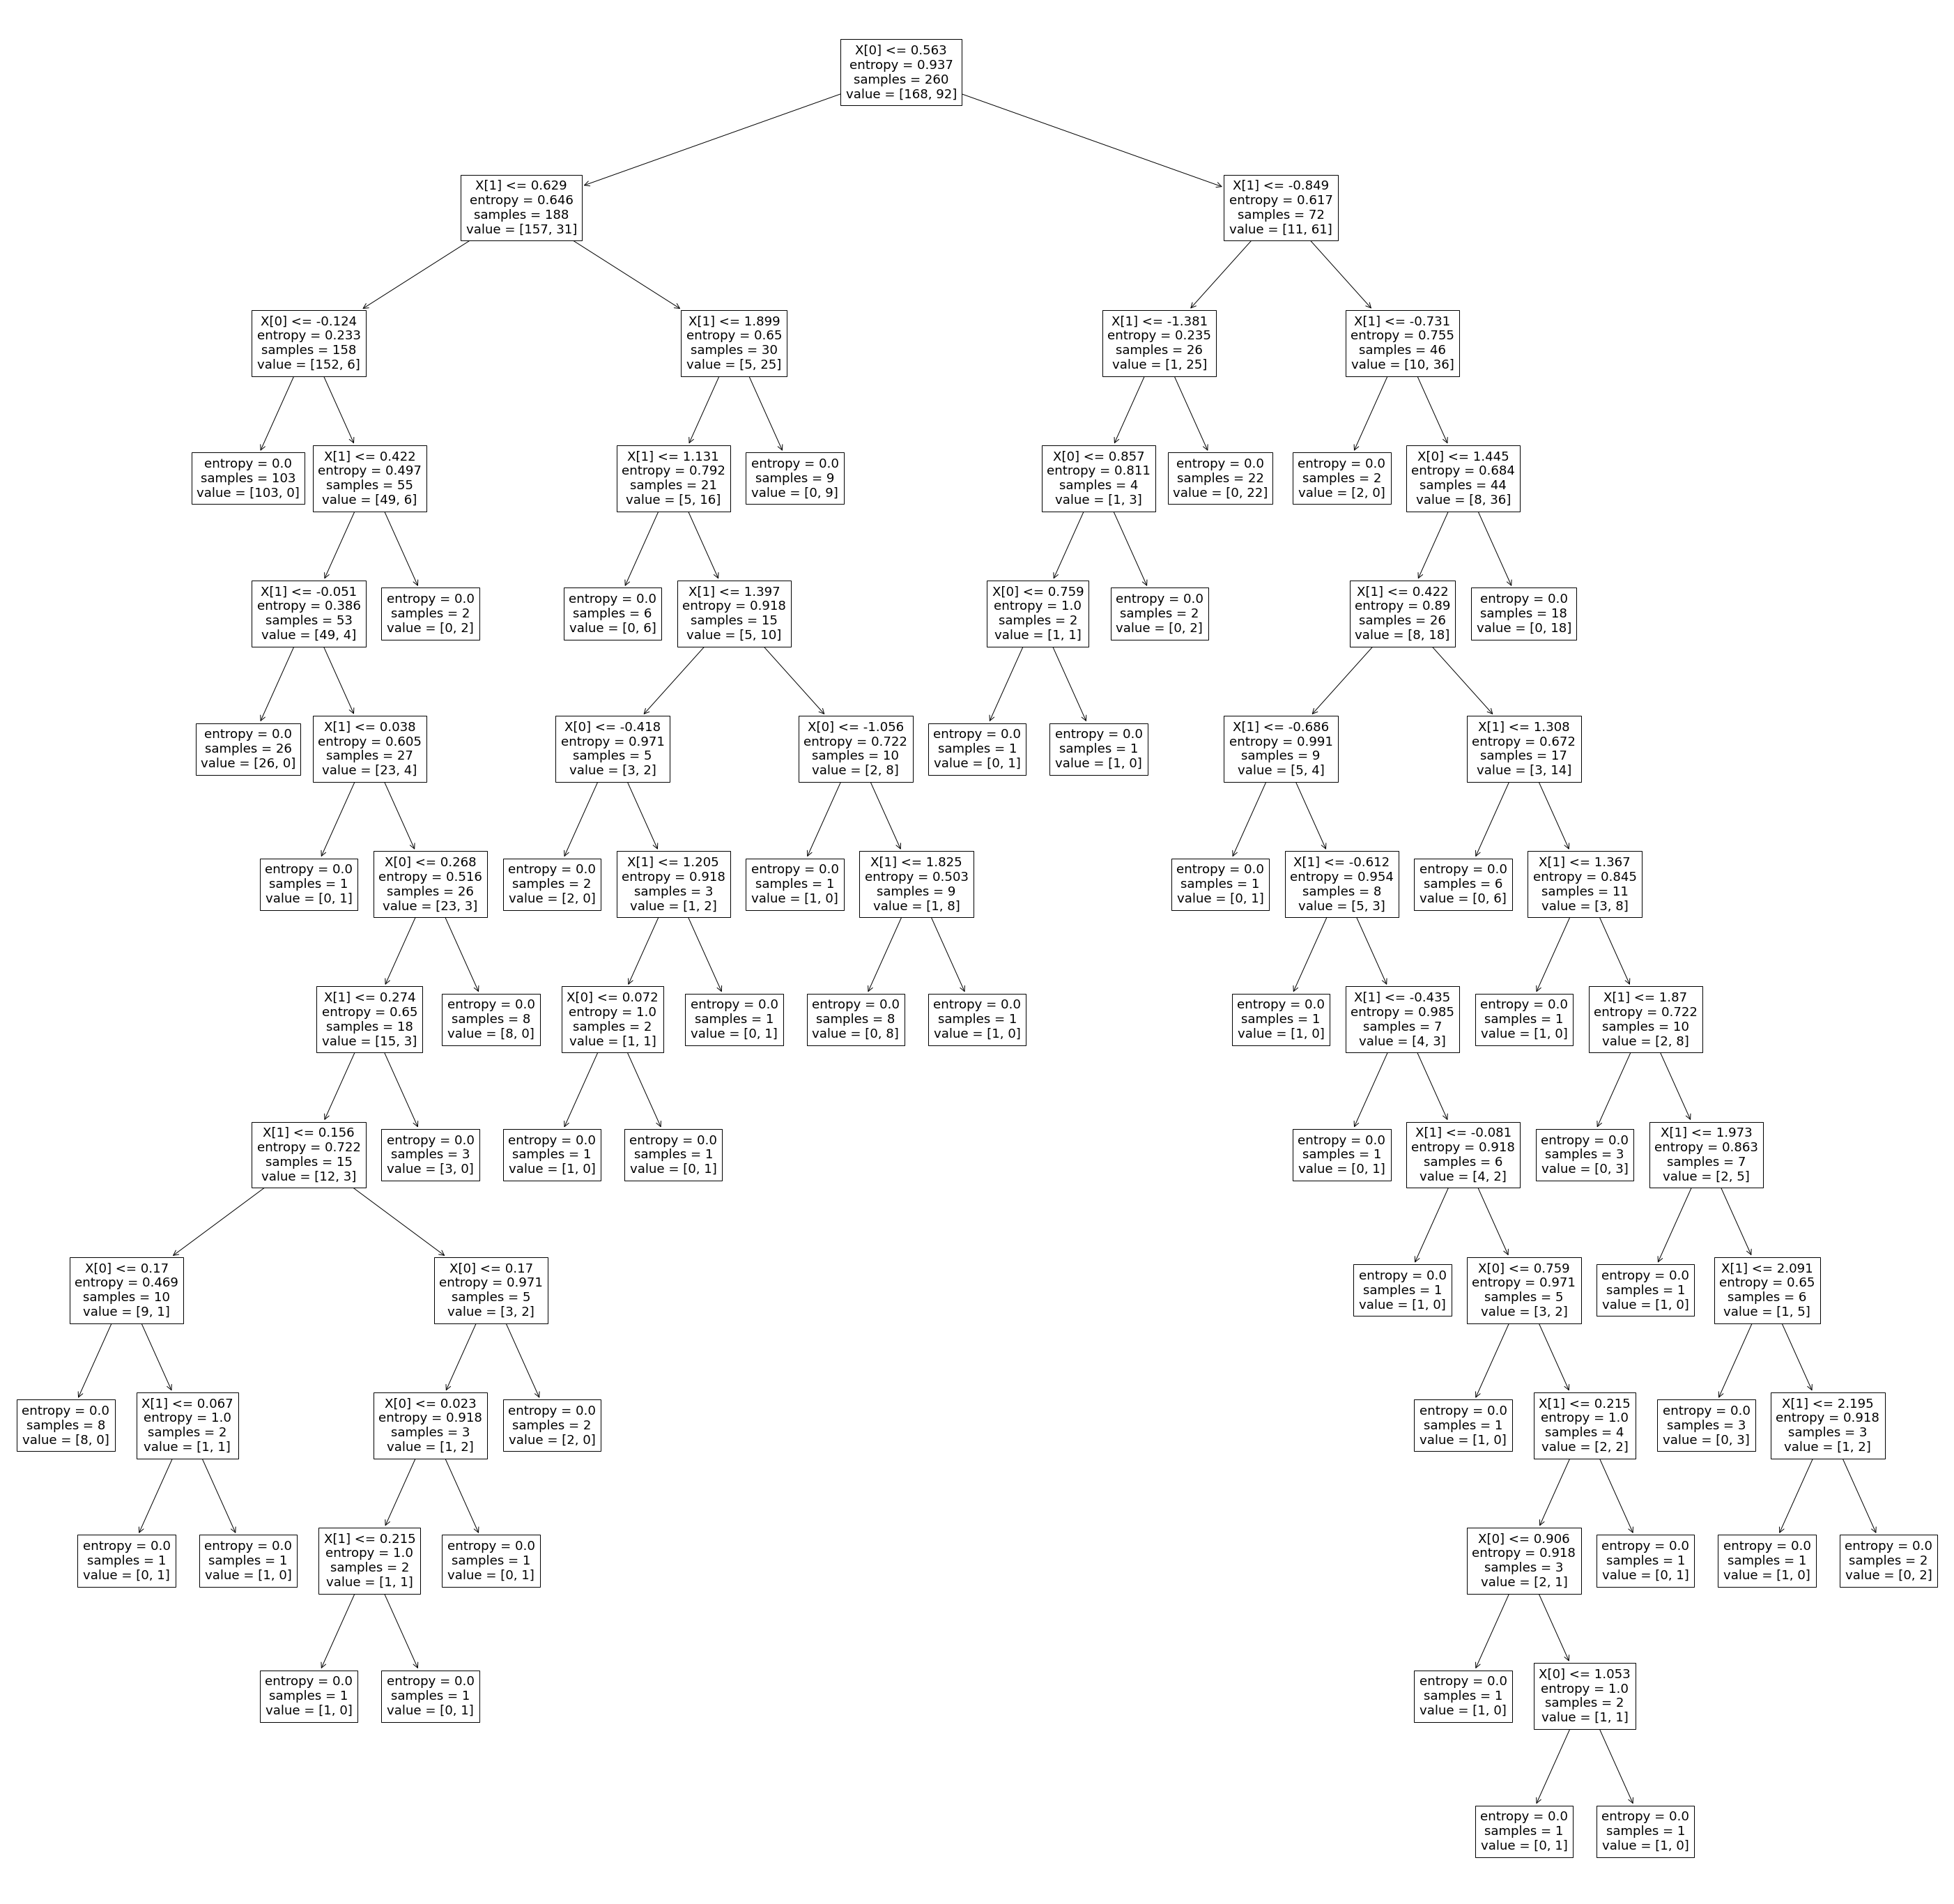

In [14]:
figr = plt.figure(figsize=(50,50))
_ = tree.plot_tree(dt)


In [15]:
#==RANDOM FOREST

In [16]:
from sklearn.ensemble import RandomForestClassifier

rfc= RandomForestClassifier(n_estimators=100, criterion='entropy')
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy')

In [17]:
rfcpred = rfc.predict(X_test)

In [18]:
print('CONFUSION MATRIX ===>\n',confusion_matrix(y_test,rfcpred), end='\n\n')
print('CLASSIFICATION REPORT ===> \n',classification_report(y_test,rfcpred), end='\n\n')
print('ACCURACY SCORE ==> \n',accuracy_score(y_test,rfcpred))

CONFUSION MATRIX ===>
 [[81  8]
 [ 6 45]]

CLASSIFICATION REPORT ===> 
               precision    recall  f1-score   support

           0       0.93      0.91      0.92        89
           1       0.85      0.88      0.87        51

    accuracy                           0.90       140
   macro avg       0.89      0.90      0.89       140
weighted avg       0.90      0.90      0.90       140


ACCURACY SCORE ==> 
 0.9


In [19]:
#=== ROC CURVE COMPARISON ===

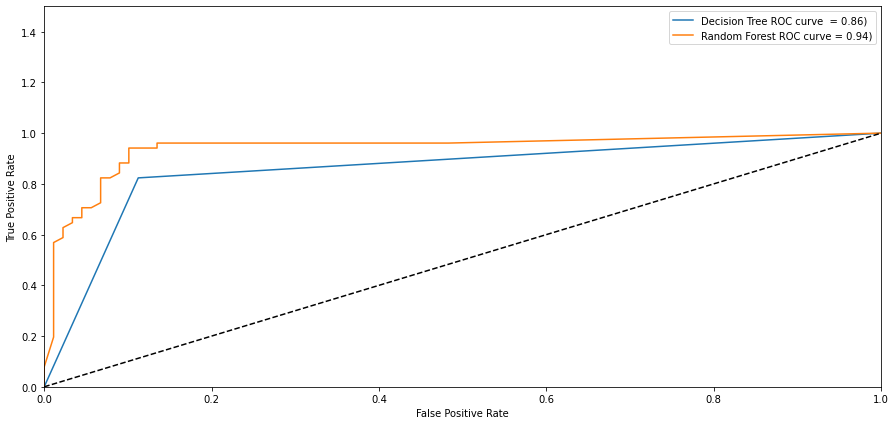

In [20]:
dt_pred = dt.predict_proba(X_test)[:,1]
fpr1, tpr1, th1 = roc_curve(y_test, dt_pred)
roc1 = auc(fpr1, tpr1) 


rfc_pred = rfc.predict_proba(X_test)[:,1]
fpr2, tpr2, th2 = roc_curve(y_test, rfc_pred)
roc2 = auc(fpr2, tpr2)


plt.figure(figsize=(15,7))
plt.plot(fpr1, tpr1, label='Decision Tree ROC curve  = %0.2f)' % (roc1))
plt.plot(fpr2, tpr2, label='Random Forest ROC curve = %0.2f)' % (roc2))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.5])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()